## Este es un repositorio de ejemplos cortos y enlaces para recetas útiles de pandas. Alentamos a los usuarios a utilizar esta documentación.

In [199]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

## 1. Expresiones idiomaticas y filtros simples

### 1.1 Splitting y filtro

In [2]:
# Dividir un data frame con un criterio booleano
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [3]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [4]:
# Criterio 1
df[df.AAA <= 5]

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [5]:
# Criterio 2
df[df.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


### 1.2 Criterios de selección - df.loc y filtro booleano

In [6]:
# Seleccionar con criterios de varias columnas
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [7]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [8]:
# …y (sin asignación devuelve una Serie)
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [9]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [10]:
# …o (con la asignación modifica el DataFrame.)
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 0.1
df

,AAA,BBB,CCC
0,0.1,10,100
1,5.0,20,50
2,0.1,30,-30
3,0.1,40,-50


### 1.3 Seleccione filas con datos más cercanos a cierto valor usando "argsort"

In [11]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [12]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [13]:
aValue = 43.0

In [14]:
df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


### 1.4 Reducir dinámicamente una lista de criterios usando operadores binarios

In [15]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [16]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [17]:
# Ahora definimos los criterios como una nueva variable
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC > -40.0

In [18]:
# Creamos otra variable que incluye los tres criterios antes descritos
AllCrit = Crit1 & Crit2 & Crit3

In [19]:
# O también podemos aplicar un criterio dinamico
import functools

In [20]:
CritList = [Crit1, Crit2, Crit3]

In [21]:
# El criterio dinamico se realiza con "functools"
AllCrit = functools.reduce(lambda x, y: x & y, CritList)

In [22]:
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


## 2. Selecciones

### 2.1 Etiquetas de fila y condicionales - Filtro doble

In [23]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [24]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [25]:
# Aplicamos dos condicionales, el primero para la columna, y el segundo para la fila (indice)
df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


### 2.2 Uso de .loc para el corte orientado a etiquetas y el corte posicional con .iloc

In [26]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)

In [27]:
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [28]:
# En pandas tenemos tres tipos de slicing:
# 1. Estilo de Python: no es inclusivo
# 2. Estilo de etiquetas pandas: inclusivo
# 3. General (Cualquier estilo de división: depende de si la división contiene etiquetas o numeros)
# con números es excluyente, con etiquetas es inclusivo.

In [29]:
# Estilo de etiquetas .loc
df.loc["bar":"kar"] 

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [30]:
# Estilo generico con números, no es inclusivo, excluye a la última fila
df[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [31]:
# Estilo generico con etiquetas, es inclusivo, incluye a todas las filas
df["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [32]:
# La ambigüedad surge cuando un índice consta de números enteros con un inicio distinto de cero o un incremento no unitario.
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

In [33]:
# Los indices comenzaran en 1
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])

In [34]:
# Slicing por numeros/posicion con .iloc, es excluyente, no incluye la fila con indice 1
df2.iloc[1:3] 

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [35]:
# Slicing por etiquetas con .loc, es incluyente
df2.loc[1:3] 

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


### 2.3 Utilizar el operador inverso tilde (~) para negar un filtro

In [36]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [37]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [38]:
# Podemos crear un filtro, y negar su expresión, colocando delante un tilde "~"
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


### 2.4 Crear columnas de forma dinámica, con la función "applymap()"

In [39]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

In [40]:
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [41]:
source_cols = df.columns  # Or some subset would work too

In [42]:
new_cols = [str(x) + "_cat" for x in source_cols]

In [43]:
categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

In [44]:
# Creamos las nuevas columnas con "applymap()"
df[new_cols] = df[source_cols].applymap(categories.get)

In [45]:
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


### 2.5 Filtrar con métodos de groupby

In [46]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)

In [47]:
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [48]:
# Método 1: idxmin() para obtener el índice de los mínimos
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [49]:
# Método 2: ordenar y luego tomar el primero de cada uno
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


## 3. Multiindice

### 3.1 Creación de un índice múltiple a partir de las etiquetas de un Data Frame

In [50]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)

In [51]:
df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [52]:
# Como índice etiquetado
df = df.set_index("row")

In [53]:
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [54]:
# Con columnas de forma jerárquica
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])

In [55]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [56]:
# Ahora apilar y reiniciar
df = df.stack(0).reset_index(1)

In [57]:
df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [58]:
# Y arregle las etiquetas (Observe que la etiqueta 'level_1' se agregó automáticamente)
df.columns = ["Sample", "All_X", "All_Y"]

In [59]:
df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


### 3.2 Realizar operaciones con un multi indice

In [60]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)

In [61]:
df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)

In [62]:
df

A                   B                   C          
          O         I         O         I         O         I
n -0.716624 -0.120246 -1.942611 -0.045961  0.343849 -0.130372
m -0.410903  0.664526  0.434717  0.895774 -0.502055  0.376106

In [63]:
# Vamos a hacer una operación de división en el multiindice
df = df.div(df["C"], level=1)

In [64]:
df

A                   B              C     
          O         I         O         I    O    I
n -2.084123  0.922336 -5.649599  0.352535  1.0  1.0
m  0.818443  1.766856 -0.865877  2.381704  1.0  1.0

### 3.3 Slicing un multi índice con "df.xs"

In [65]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

In [66]:
index = pd.MultiIndex.from_tuples(coords)

In [67]:
df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

In [68]:
df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [69]:
# Para tomar la sección transversal del 1er nivel y 1er eje el índice utilizamos: level=0, axis=0
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


In [70]:
# Para el segundo nivel utilizamos level=1, axis=0
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


### 3.4 Slicing un multi indice a través de una variable "slice"

In [71]:
import itertools

In [72]:
index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

In [73]:
df = pd.DataFrame(data, indx, cols)
df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [74]:
# Variable de filtro, para hacer el slice
All = slice(None)

In [75]:
df.loc["Violet"]

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [76]:
df.loc[(All, "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [77]:
df.loc[(slice("Ada", "Quinn"), "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [78]:
df.loc[(All, "Math"), ("Exams")]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [79]:
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


### 3.5 Ordenar un multi indice

In [80]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

## 4. Missing data

### 4.1 Llenar adelante una serie de tiempo inversa

In [81]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)

In [82]:
df.loc[df.index[3], "A"] = np.nan

In [83]:
df

,A
2013-08-01,-1.306721
2013-08-02,-0.321888
2013-08-05,-1.011304
2013-08-06,NaN
2013-08-07,-0.780852
2013-08-08,1.577919


In [84]:
df.bfill()

,A
2013-08-01,-1.306721
2013-08-02,-0.321888
2013-08-05,-1.011304
2013-08-06,-0.780852
2013-08-07,-0.780852
2013-08-08,1.577919


## 5. Agrupamientos - groupby()

### 5.1 Agrupamientos básicos con apply()

In [85]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

In [86]:
df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [87]:
# Liste el tamaño de los animales con el peso más alto.
df.groupby("animal").apply(lambda subf: subf['size'][subf["weight"].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

### 5.2 Utilizando el metodo "get_group"

In [88]:
# Creamos un grupo por la variable "animal"
gb = df.groupby(["animal"])

In [89]:
# Ahora seleccionamos solo a los gatos
gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


### 5.3 Aplicar una funcion especifica a un grupo

In [90]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])

In [91]:
# Creamos una variable, y aplicamos la funcion a un nuevo grupo
expected_df = gb.apply(GrowUp)

In [92]:
expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


### 5.4 Expandir los datos con expanding()

In [93]:
S = pd.Series([i / 100.0 for i in range(1, 11)])

In [94]:
def cum_ret(x, y):
    return x * (1 + y)

In [95]:
def red(x):
    return functools.reduce(cum_ret, x, 1.0)

In [96]:
S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

### 5.5 Reemplazar los valores del grupo con una funcion

In [97]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})

In [98]:
df

,A,B
0,1,1
1,1,-1
2,2,1
3,2,2


In [99]:
gb = df.groupby("A")

In [100]:
def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())

In [101]:
gb.transform(replace)

,B
0,1.0
1,1.0
2,1.0
3,2.0


### 5.6 Ordenar grupos por datos agregados

In [102]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)

In [103]:
code_groups = df.groupby("code")

In [104]:
agg_n_sort_order = code_groups[["data"]].transform(sum).sort_values(by="data")

In [105]:
sorted_df = df.loc[agg_n_sort_order.index]

In [106]:
sorted_df.sort_values(by='data')

,code,data,flag
4,bar,-0.59,False
1,bar,-0.21,True
0,foo,0.16,False
2,baz,0.33,False
3,foo,0.45,True
5,baz,0.62,True


### 5.7 Crear múltiples columnas agregadas

In [107]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")

In [108]:
ts = pd.Series(data=list(range(10)), index=rng)

In [109]:
def MyCust(x):
    if len(x) > 2:
        return x[1] * 1.234
    return pd.NaT

In [110]:
mhc = {"Mean": np.mean, "Max": np.max, "Custom": MyCust}

In [111]:
ts.resample("5min").apply(mhc)

,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [112]:
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

### 5.8 Crear una columna de conteo de valores y  reasignarla al marco de datos

In [113]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

In [114]:
df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [115]:
df["Counts"] = df.groupby(["Color"]).transform(len)

In [116]:
df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


### 5.9 Desplazar grupos de valores en una columna según el índice

In [117]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)

In [118]:
df

,line_race,beyer
Last Gunfighter,10,99
Last Gunfighter,10,102
Last Gunfighter,8,103
Paynter,10,103
Paynter,10,88
Paynter,8,100


In [119]:
# Crearemos una nueva columna, que tomará los valores de la segunda
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)

In [120]:
df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


### 5.10 Seleccionar la fila con el valor máximo de cada grupo

In [121]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "number": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])

In [122]:
df

number
host  service        
other mail          1
      web           2
that  mail          1
this  mail          2
      web           1

In [123]:
mask = df.groupby(level=0).agg("idxmax")

In [124]:
df_count = df.loc[mask["number"]].reset_index()

In [125]:
df_count

,host,service,number
0,other,web,2
1,that,mail,1
2,this,mail,2


### 5.11 Agrupación como itertools.groupby de Python

In [126]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])

In [127]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups

{1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

In [128]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

## 6. Splitting

In [129]:
# Crear una lista de data frame, divida usando una delineación basada en la lógica incluida en las filas.
df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)

In [130]:
df

,Case,Data
0,A,-1.108950
1,A,-0.940809
2,A,1.776660
3,B,0.833299
4,A,-0.093567
5,A,0.202087
6,B,-0.510470
7,A,-0.867474
8,A,-1.545603


In [131]:
dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]

In [132]:
dfs[0]

,Case,Data
0,A,-1.108950
1,A,-0.940809
2,A,1.776660
3,B,0.833299


In [133]:
dfs[1]

,Case,Data
4,A,-0.093567
5,A,0.202087
6,B,-0.510470


In [134]:
dfs[2]

,Case,Data
7,A,-0.867474
8,A,-1.545603


## 7. Pivot Tables

### 7.1 Sumas parciales y subtotales 

In [135]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

In [136]:
df

,Province,City,Sales
0,ON,Toronto,13
1,QC,Montreal,6
2,BC,Vancouver,16
3,AL,Calgary,8
4,AL,Edmonton,4
5,MN,Winnipeg,3
6,ON,Windsor,1


In [137]:
table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc=np.sum,
    margins=True,
)

In [138]:
table

Sales                                                         
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All
Province                                                                 
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

In [139]:
table.stack("City")

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

### 7.2 Tabla de frecuencias como plyr en R

In [140]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

In [141]:
df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)

In [142]:
df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


### 7.3 Crear tabulaciones cruzadas de año y mes

In [143]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="M", periods=36),
)

In [144]:
pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)

,2011,2012,2013
1,-0.647570,-1.883022,1.622099
2,0.759044,-0.171361,0.044604
3,-1.893415,-0.680656,0.824811
4,0.304350,-0.291841,-1.339593
5,1.201040,0.965974,-0.012862
6,-1.171092,0.333649,1.119947
7,0.771306,0.602234,-0.301622
8,0.226352,-1.121186,-1.431371
9,-0.242658,0.037391,-1.354743
10,0.705850,-0.908688,0.189232


### 7.4 Apply

In [155]:
# Apply para organizar: convertir listas incrustadas en un marco MultiIndex
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)

In [149]:
df

,A,B
I,"[2, 4, 8, 16]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


In [146]:
def SeriesFromSubList(aList):
    return pd.Series(aList)

In [147]:
df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

In [148]:
df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [150]:
# Rolling apply con un DataFrame que devuelve una Serie
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)

In [151]:
df

,A,B
2001-01-01,0.000022,-0.000146
2001-01-02,-0.000099,0.000015
2001-01-03,-0.000149,-0.000005
2001-01-04,0.000073,-0.000089
2001-01-05,-0.000025,0.000076
...,...,...
2006-06-19,-0.000014,-0.000005
2006-06-20,-0.000219,-0.000137
2006-06-21,0.000081,-0.000039
2006-06-22,0.000181,0.000009


In [152]:
def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]

In [153]:
s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)

In [154]:
s

2001-01-01   -0.004611
2001-01-02   -0.002669
2001-01-03   -0.002846
2001-01-04   -0.001700
2001-01-05    0.000973
                ...   
2006-04-30    0.005493
2006-05-01    0.003456
2006-05-02    0.002994
2006-05-03    0.003077
2006-05-04    0.002945
Length: 1950, dtype: float64

In [156]:
# Rolling apply con un DataFrame que devuelve un Scalar
rng = pd.date_range(start="2014-01-01", periods=100)

In [157]:
df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)

In [158]:
df

,Open,Close,Volume
2014-01-01,-0.386228,-1.111146,836
2014-01-02,-0.633890,0.218393,565
2014-01-03,-0.759054,-0.016459,1614
2014-01-04,-0.241190,-0.263727,232
2014-01-05,1.382130,-0.942104,223
...,...,...,...
2014-04-06,-1.473815,0.813465,1930
2014-04-07,0.975930,-0.349935,1486
2014-04-08,-1.515890,-0.055069,171
2014-04-09,-0.379303,0.648111,1196


In [160]:
def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()

In [161]:
window = 5

In [162]:
s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)

In [163]:
s.round(2)

2014-01-06   -0.32
2014-01-07   -0.11
2014-01-08   -0.09
2014-01-09   -0.37
2014-01-10   -0.30
              ... 
2014-04-06   -0.52
2014-04-07   -0.19
2014-04-08   -0.04
2014-04-09   -0.13
2014-04-10    0.24
Length: 95, dtype: float64

## 8. Merge - Unir pd.concat()

In [164]:
# Concatenar dos marcos de datos con índice superpuesto (emular R rbind)
rng = pd.date_range("2000-01-01", periods=6)

In [165]:
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

In [166]:
df2 = df1.copy()

In [167]:
# Utilizamos pd.concat() para unir los dos data frame
df = pd.concat([df1, df2], ignore_index=True)

In [168]:
df

,A,B,C
0,-1.241566,0.390819,1.548052
1,-0.589823,-1.115831,1.543399
2,-0.249262,-0.687741,0.331794
3,1.401681,-0.424478,-0.763241
4,0.381540,0.048720,0.665792
5,-0.453229,1.371279,0.735532
6,-1.241566,0.390819,1.548052
7,-0.589823,-1.115831,1.543399
8,-0.249262,-0.687741,0.331794
9,1.401681,-0.424478,-0.763241


### 8.1 Self Join de un DataFrame

In [169]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

In [170]:
df

,Area,Bins,Test_0,Data
0,A,110,0,-0.020942
1,A,110,1,0.122203
2,A,160,0,-0.802960
3,A,160,1,-0.218399
4,A,160,2,0.693430
5,C,40,0,0.591229
6,C,40,1,0.967168


In [171]:
df["Test_1"] = df["Test_0"] - 1

In [172]:
# Ahora hacemos un join con la misma tabla
pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,-0.020942,-1,1,0.122203,0
1,A,160,0,-0.802960,-1,1,-0.218399,0
2,A,160,1,-0.218399,0,2,0.693430,1
3,C,40,0,0.591229,-1,1,0.967168,0


## 9. Plot - Graficar

In [173]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)

In [174]:
df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)

<AxesSubplot:title={'center':'price'}, xlabel='quartiles'>

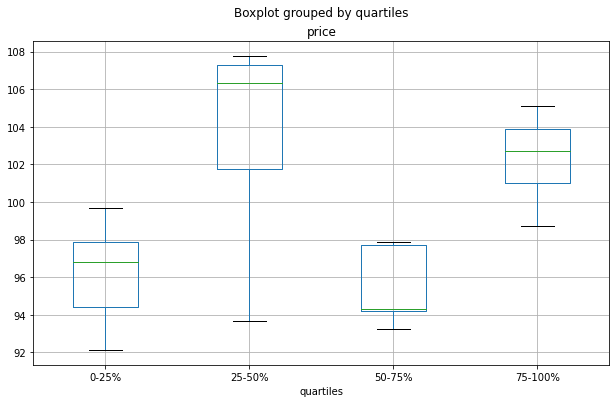

In [182]:
df.boxplot(column="price", by="quartiles", figsize=(10, 6))

## 10. Carga de datos

### 10.1 Lectura de varios archivos para crear un solo DataFrame

In [183]:
# La mejor manera de combinar varios archivos en un solo marco de datos es leer los marcos individuales uno por uno, 
# poner todos los marcos individuales en una lista y luego combinar los marcos en la lista usando pd.concat()
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))

In [184]:
files = ["file_0.csv", "file_1.csv", "file_2.csv"]

In [186]:
# Utilizando la funcion pd.concat() podemos unir los archivos
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

### 10.2 Análisis de componentes de fecha en varias columnas

In [187]:
i = pd.date_range("20000101", periods=10000)

In [188]:
df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

In [189]:
df.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [190]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
%timeit pd.to_datetime(ds)

8.48 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.17 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 10.3 Saltar fila entre encabezado y datos

In [191]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

In [192]:
data

';;;;\n ;;;;\n ;;;;\n ;;;;\n ;;;;\n ;;;;\n;;;;\n ;;;;\n ;;;;\n;;;;\ndate;Param1;Param2;Param4;Param5\n    ;m²;°C;m²;m\n;;;;\n01.01.1990 00:00;1;1;2;3\n01.01.1990 01:00;5;3;4;5\n01.01.1990 02:00;9;5;6;7\n01.01.1990 03:00;13;7;8;9\n01.01.1990 04:00;17;9;10;11\n01.01.1990 05:00;21;11;12;13\n'

### 10.3.1 Opción 1: pasar filas explícitamente para omitir filas

In [193]:
from io import StringIO

In [194]:
pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12], #Estas son las filas que vamos a saltar
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


### 10.3.2 Opción 2: lea los nombres de las columnas y luego los datos

In [195]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [197]:
# Cuando leemos los datos, podemos definir cuantas "rows" queremos ver
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

In [198]:
pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13
